In [1]:
# install if not yet done
using Pkg

# Pkg.add(url="https://github.com/mppmu/BoostFractor.jl.git")
# Pkg.add(url="https://github.com/bergermann/Dragoon.jl.git")
Pkg.update()

    Updating registry at `C:\Users\domin\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
    Updating git-repo `https://github.com/mppmu/BoostFractor.jl.git`
  No Changes to `C:\Users\domin\OneDrive\Desktop\Julia Files\Dragoon.jl\Project.toml`
  No Changes to `C:\Users\domin\OneDrive\Desktop\Julia Files\Dragoon.jl\Manifest.toml`


In [2]:
using Dragoon, Plots #, Dates

In [3]:
n = 20 # number of discs in the booster

initdist = findpeak1d(22.025e9,n) # initial disc configuration

freqs = genFreqs(22.025e9,50e6; n=100) # optimize on these frequencies
freqsplot = genFreqs(22.025e9,150e6; n=1000) # plot with these frequencies

booster = AnalyticalBooster(initdist; ndisk=n)  # physical properties of the booster
booster.tand = 1e-5

hist = initHist(booster,10000,freqs,ObjRef1dTest());

In [10]:
trace = nelderMead(booster,hist,freqs,
                    1.,1+2/n,0.75-1/2n,1-1/n,1e-9,
                    ObjRef1dTest(),
                    InitSimplexRegular(1e-4),
                    DefaultSimplexSampler,
                    UnstuckDont;
                    maxiter=Int(1e4),
                    showtrace=true,
                    showevery=1000,
                    unstuckisiter=true)

Iter: 10000, timestamp: 4 minutes, 54 seconds
Iter finished. Objective value: 0.989

Iter: 20000, timestamp: 4 minutes, 54 seconds
Iter finished. Objective value: 0.989

Iter: 30000, timestamp: 4 minutes, 54 seconds
Iter finished. Objective value: 0.989

Iter: 40000, timestamp: 4 minutes, 55 seconds
Iter finished. Objective value: 0.989

Iter: 50000, timestamp: 4 minutes, 55 seconds
Iter finished. Objective value: 0.989

Iter: 60000, timestamp: 4 minutes, 55 seconds
Iter finished. Objective value: 0.989

Iter: 70000, timestamp: 4 minutes, 55 seconds
Iter finished. Objective value: 0.989

Iter: 80000, timestamp: 4 minutes, 55 seconds
Iter finished. Objective value: 0.989

Iter: 90000, timestamp: 4 minutes, 55 seconds
Iter finished. Objective value: 0.989

Iter: 100000, timestamp: 4 minutes, 55 seconds
Iter finished. Objective value: 0.989

Terminated. Max iterations reached.
Final objective value: 0.989
Elapsed movement time:  4 minutes, 55 seconds
Summed distance:   0.452
Elapsed compu

100001-element Vector{Dragoon.NMTrace}:
 Dragoon.NMTrace([0.0072629604234138905 0.0072629604234138905 … 0.0072629604234138905 0.0072629604234138905; 0.015461993290443742 0.015461993290443742 … 0.015461993290443742 0.015461993290443742; … ; 0.15476156593410278 0.15476156593410278 … 0.15476156593410278 0.15483411355911378; 0.1629482129063767 0.1629482129063767 … 0.1629482129063767 0.1629482129063767], [0.9901024356732298, 0.9908315815314933, 0.9909287066809663, 0.9910483276037358, 0.9910653204802331, 0.9911104031500468, 0.9911534908348606, 0.9911717682602996, 0.9913622007535251, 0.991432509248019  …  0.9918125139324923, 0.9920160070794533, 0.9928298835866948, 0.9933404317717883, 0.993431985576325, 0.9937124467258192, 0.9937779554257832, 0.9942846472827837, 0.9954155763231808, 0.9961732588432677], [0.0072629604234138905, 0.015461993290443735, 0.023659327925839198, 0.0318650475804652, 0.039987203260068396, 0.04826126875532256, 0.05634507821861611, 0.06464262389937533, 0.07288161479483554, 

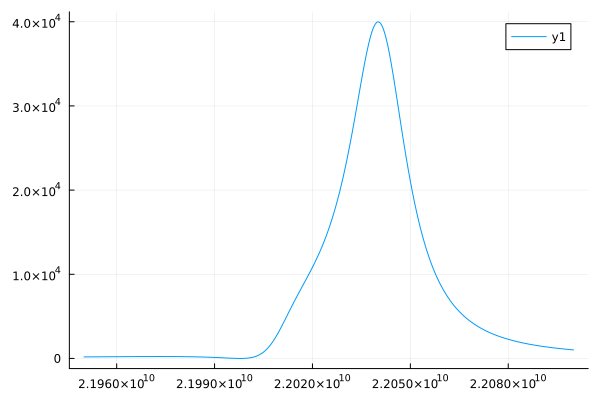

In [9]:
plot(freqsplot/1e9,getBoost1d(booster,freqsplot))

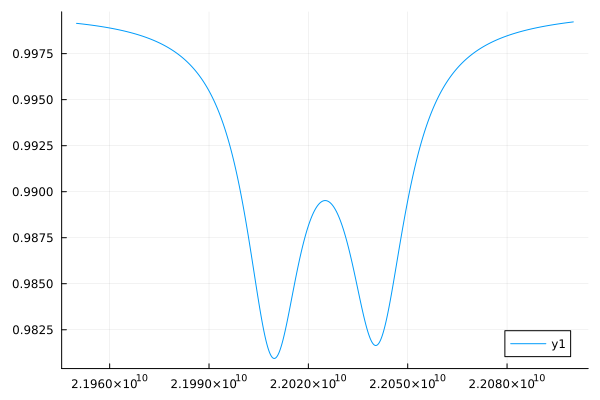

In [8]:
plot(freqsplot/1e9,abs.(getRef1d(booster,freqsplot)))

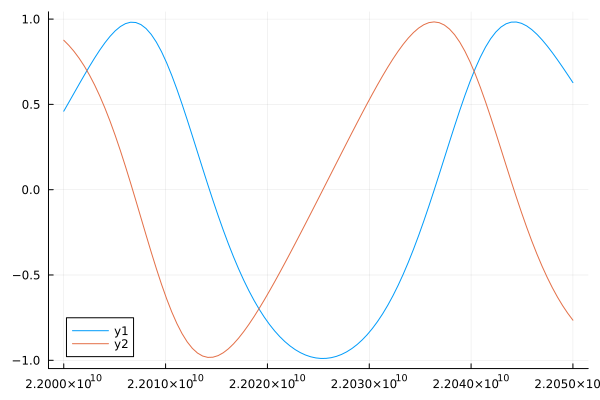

In [6]:
plot(freqs,real(getRef1d(booster,freqs)))
plot!(freqs,imag(getRef1d(booster,freqs)))

In [ ]:
plot(freqs,real(ref1))
plot!(freqs,imag(ref1))

In [ ]:
scatter(pos2dist(booster.pos))

In [ ]:
analyse(hist,trace,freqsplot; freqs=freqs,div=20,scale=1e9,ylim=[-0.05e4,3e4])